In [44]:
#1.Perfrom Data Preprocessing
#2.Model Building using Logistic Regression and Decision Tree and Random Forest
#3.Calculate Performance metrics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('Employee-Attrition.csv')

In [3]:
#Data preprocessing
dataset['Attrition'] = dataset['Attrition'].map({'Yes':1, 'No':0})
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Converting Categorical Variables to Binary
dataset.Education.replace({1: 'High School',
                       2:'Undergrad',
                       3:'Graduate',
                       4:'Post Graduate',
                       5:'Doctorate'},inplace=True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Undergrad,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Undergrad,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Post Graduate,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,High School,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
cols = ["JobInvolvement", "JobSatisfaction", "PerformanceRating"]

for col in cols:
    dataset[col].replace({1 : "Low",
                                    2 : "Medium",
                                    3 : "High",
                                    4 : "Very High"}, inplace = True)
dataset.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Undergrad,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Undergrad,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Post Graduate,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,High School,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#deleting unnecessary cols
dataset = dataset.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1)


In [7]:
#checking unique values and removing duplicate values
attFeatures = []
for i in dataset.columns:
    attFeatures.append([i, dataset[i].nunique(), dataset[i].drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"[1, 0]"
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"[Undergrad, High School, Post Graduate, Gradua..."
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EnvironmentSatisfaction,4,"[2, 3, 4, 1]"
9,Gender,2,"[Female, Male]"


<ipython-input-45-d081d523764a>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, value in dataset.iteritems():


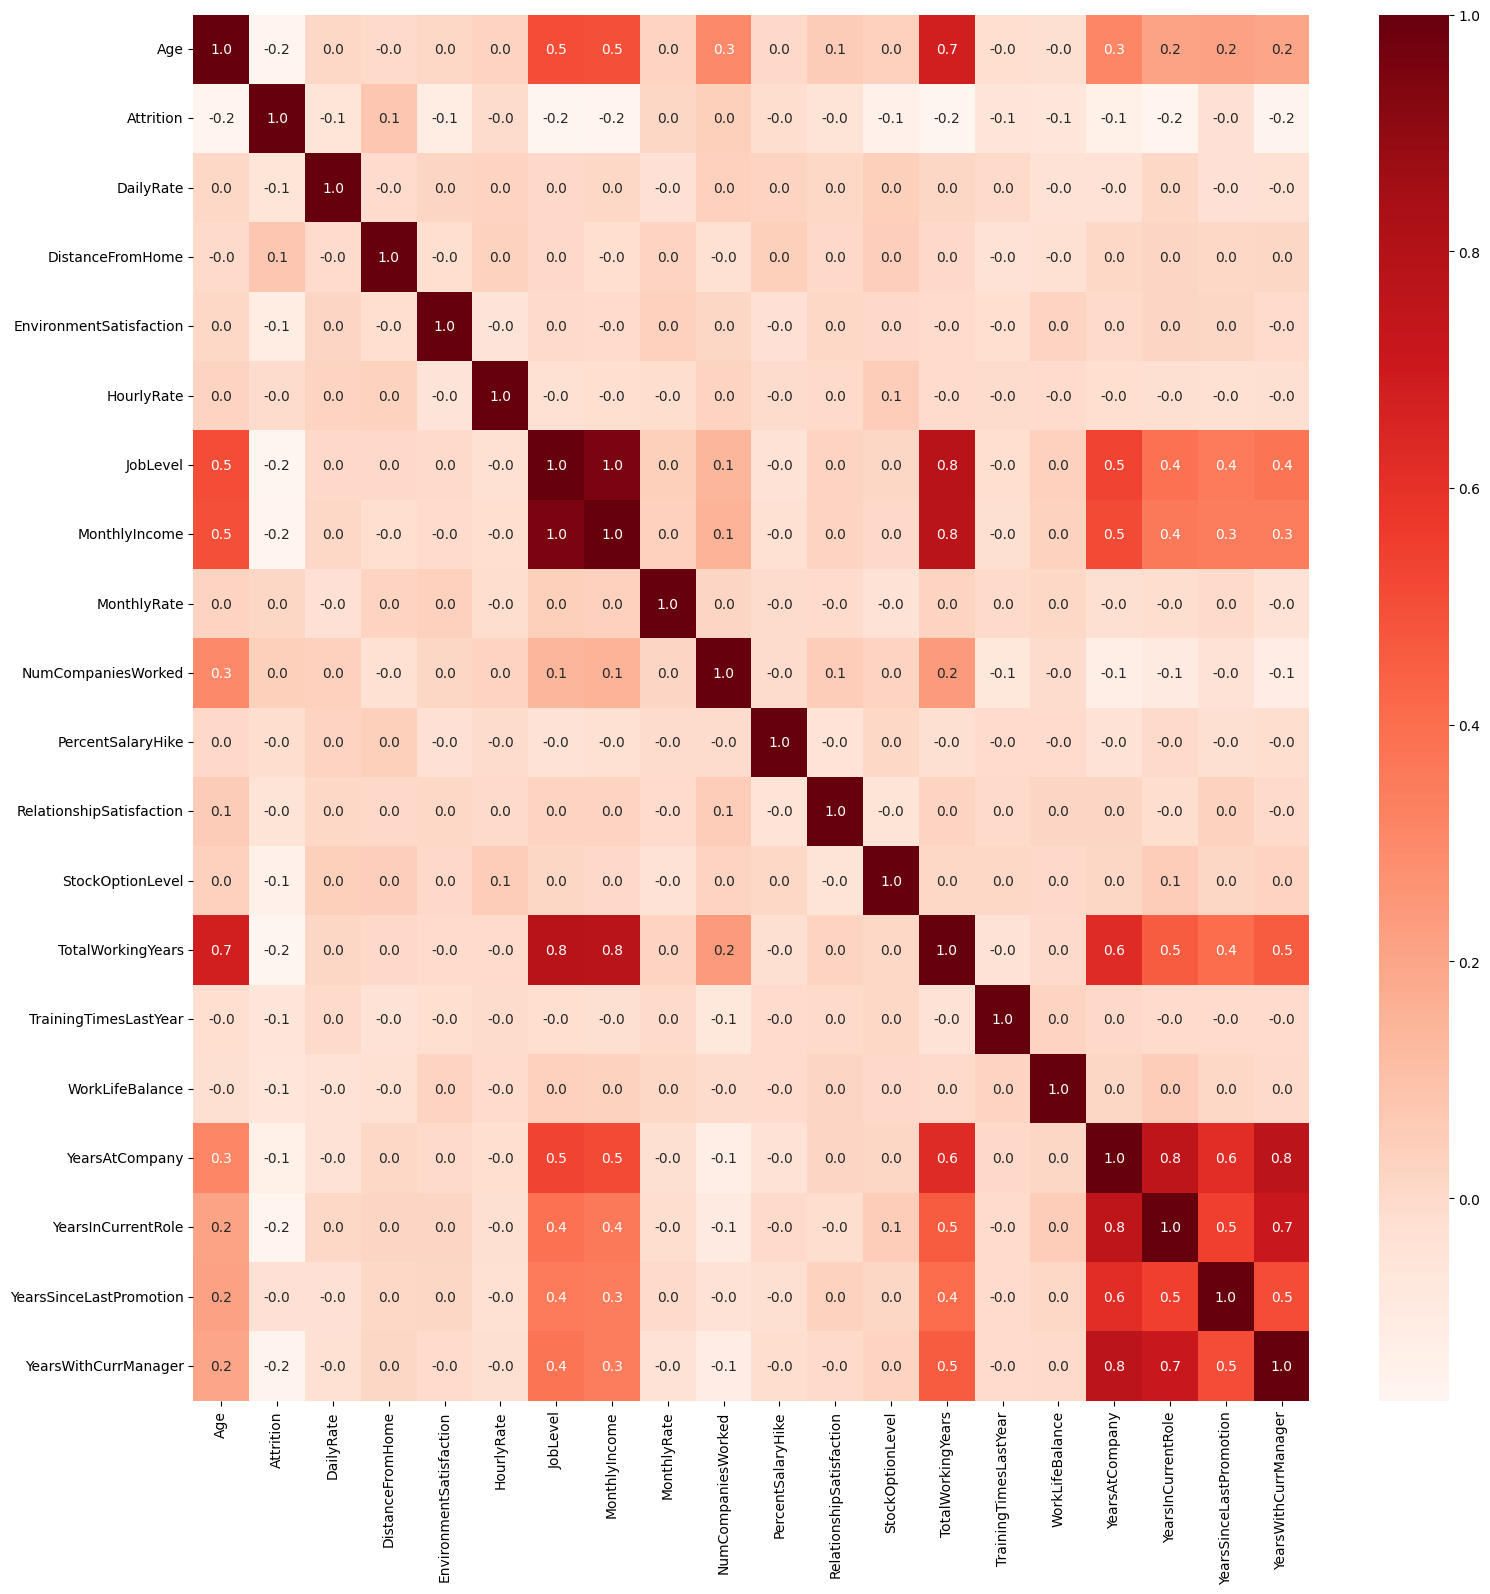

In [45]:
#correlation matrix
categorical = []
for col, value in dataset.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

df_cat = dataset[categorical]
numerical = dataset.columns.difference(categorical)
df_num= dataset[numerical]
plt.figure(figsize=(18,18))
sns.heatmap(df_num.corr(),annot=True ,cmap='Reds',fmt= '.1f')
plt.show()

In [10]:
dummies = pd.get_dummies(df_cat)
dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Doctorate,Education_Graduate,Education_High School,Education_Post Graduate,...,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_High,PerformanceRating_Very High
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
1,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
4,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0


In [11]:
dummy_df =dataset
dummy_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Undergrad,Life Sciences,2,Female,...,High,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,3,Male,...,Very High,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Undergrad,Other,4,Male,...,High,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Post Graduate,Life Sciences,4,Female,...,High,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,High School,Medical,1,Male,...,High,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,Undergrad,Medical,3,Male,...,High,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,High School,Medical,4,Male,...,High,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,Graduate,Life Sciences,2,Male,...,Very High,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,Graduate,Medical,4,Male,...,High,4,0,17,3,2,9,6,0,8


In [12]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(dummies)
x_normalized

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

DECISION TREE CLASSIFIER

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [15]:
#Splitting into training feature
x = x_normalized
y = dataset['Attrition'].values
x

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [18]:
#using smote over the minority classess for balancing
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

In [19]:
#Splitting into test and training set
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [20]:
#Fitting Data into Model & Checking the Training & Testing Accuracy.
model_dt = DecisionTreeClassifier(max_depth=8, random_state=1,criterion ='gini')
model_dt.fit(x_train,y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Test score: ",model_dt_score_test)

Training score:  0.8985801217038539
Test score:  0.8582995951417004


In [21]:
#performance matrix
y_pred1 = model_dt.predict(x_test)
accuracy_score(y_test,y_pred1)

0.8582995951417004

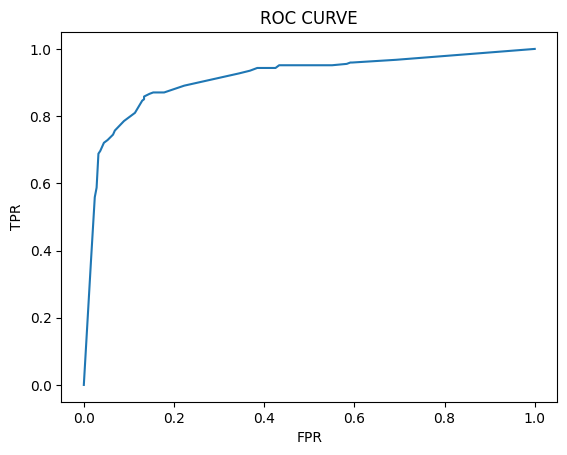

In [22]:
#ROC Curve
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
fit_rf = RandomForestClassifier(random_state=1)
fit_rf.fit(x_train, y_train)
y_pred_rf = fit_rf.predict(x_test)

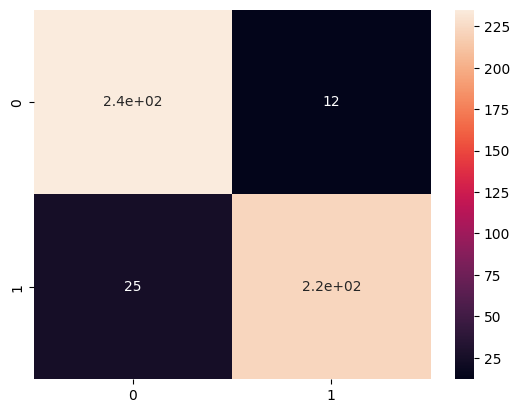

In [24]:
#checking set performance
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True )
plt.show()

In [25]:
#checking probability of the model and classification report
y_prob_rf = fit_rf.predict_proba(x_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf[:,1])
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       247
           1       0.95      0.90      0.92       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



In [34]:
#accuracy of the model
accuracy_rf = accuracy_score(y_test ,y_pred_rf)
accuracy_rf

0.9251012145748988

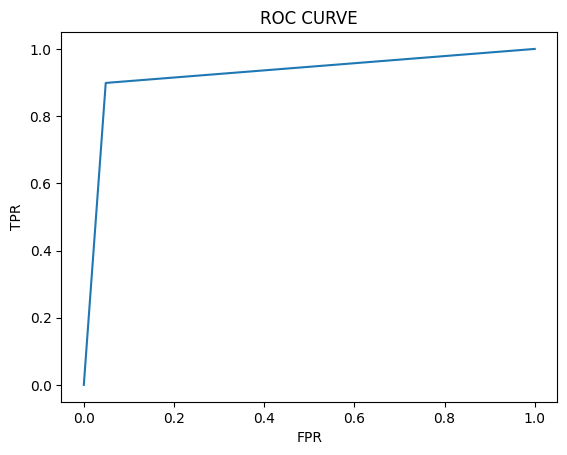

In [42]:
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

Logistic Regression

In [38]:
#data model and predecting the test Data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

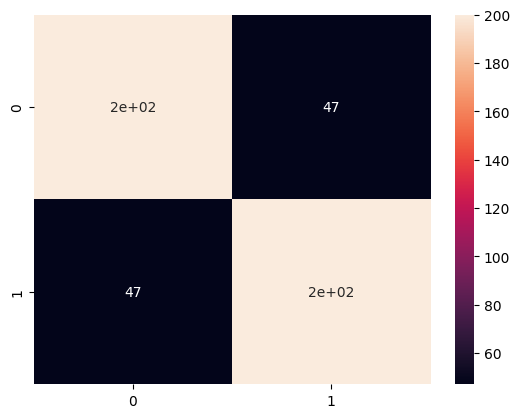

In [39]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.show()

In [40]:
accuracy_logreg = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_logreg)
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.8097165991902834
Precision: 0.8097165991902834


In [41]:
#predection of the model and classification report
y_pred_proba = logreg.predict_proba(x_test)[::,1]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       247
           1       0.81      0.81      0.81       247

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494



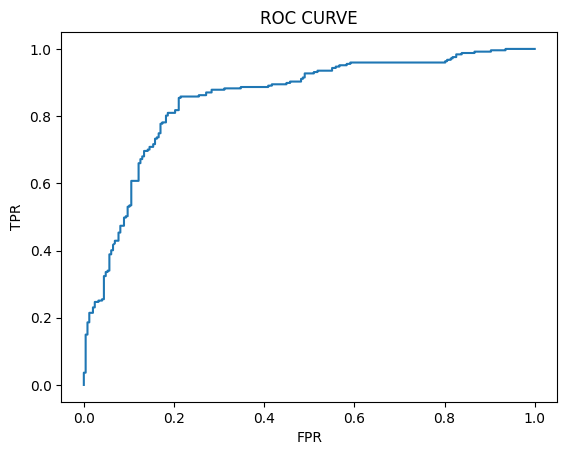

In [43]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()